**1: Importing of Libraries**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**2: Extracting the Updated/Augmented Automobile Data File**

In [9]:
import pandas as pd
from google.colab import files


# Read the dataset only once
#dataset = pd.read_csv('telco-customer-churn.csv')


# Upload the dataset to Colab environment
uploaded = files.upload()

# Load the dataset from uploaded files (assuming the file name is 'telco-customer-churn.csv')
dataset = pd.read_csv('telco-customer-churn.csv')


# Display the first few rows of the dataset to ensure it's loaded correctly
print(dataset.head())



Saving telco-customer-churn.csv to telco-customer-churn (1).csv
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

In [10]:
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
dataset.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


**3: Data Wrangling**

**3: 1. Handling Missing Data**

In [12]:
#Replace the '?' in the data file with Nan
dataset.replace("?",np.NaN, inplace=True)

In [13]:
#Calculating the number of missing data in each column and printing the same
dataset.isnull().sum()
for column in dataset.columns:
    print(column)
    print(dataset[column].isnull().sum())

customerID
0
gender
0
SeniorCitizen
0
Partner
0
Dependents
0
tenure
0
PhoneService
0
MultipleLines
0
InternetService
0
OnlineSecurity
0
OnlineBackup
0
DeviceProtection
0
TechSupport
0
StreamingTV
0
StreamingMovies
0
Contract
0
PaperlessBilling
0
PaymentMethod
0
MonthlyCharges
0
TotalCharges
0
Churn
0


In [14]:
# Identify numeric columns
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (usually object type in pandas)
categorical_columns = dataset.select_dtypes(include=['object']).columns.tolist()

# If there are any text columns (which are also often 'object'), you can refine them here
# Check if any categorical columns are actually text
text_columns = [col for col in categorical_columns if dataset[col].str.contains('[A-Za-z]', na=False).any()]

# Now remove text columns from categorical
categorical_columns = [col for col in categorical_columns if col not in text_columns]

# Display the lists
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)
print("Text Columns:", text_columns)

Numeric Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges']
Categorical Columns: ['TotalCharges']
Text Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


**3: 2. Correct Data Format**

In [15]:
#Checking the data types for each column
dataset.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


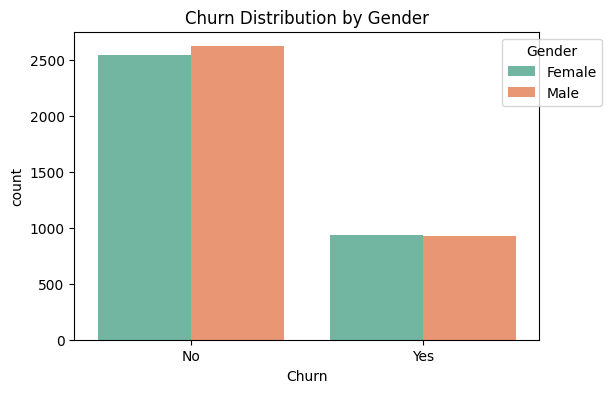

In [16]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already loaded your dataset
# Count plot for 'Churn' distribution by 'gender'
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='Churn', hue='gender', palette='Set2')
plt.title('Churn Distribution by Gender')

# Optionally remove the legend if not needed
plt.legend(title='Gender', loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()


In [17]:
# Convert multi-class categorical columns to numeric codes
categorical_columns = ['InternetService', 'Contract', 'PaymentMethod', 'MultipleLines',
                       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies']
for column in categorical_columns:
    dataset[column] = dataset[column].astype('category').cat.codes

In [18]:
# Convert 'TotalCharges' to numeric
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'], errors='coerce')

In [19]:
# Check the data types
print(dataset.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines          int8
InternetService        int8
OnlineSecurity         int8
OnlineBackup           int8
DeviceProtection       int8
TechSupport            int8
StreamingTV            int8
StreamingMovies        int8
Contract               int8
PaperlessBilling     object
PaymentMethod          int8
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [20]:
dataset.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,1,0,0,...,0,0,0,0,0,Yes,2,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,0,0,2,...,2,0,0,0,1,No,3,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,0,0,2,...,0,0,0,0,0,Yes,3,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,1,0,2,...,2,2,0,0,1,No,0,42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,0,1,0,...,0,0,0,0,0,Yes,2,70.70,151.65,Yes


In [21]:
dataset.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,2,0,2,...,2,2,2,2,1,Yes,3,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,2,1,0,...,2,0,2,2,1,Yes,1,103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,1,0,2,...,0,0,0,0,0,Yes,2,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,2,1,0,...,0,0,0,0,0,Yes,3,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,0,1,2,...,2,2,2,2,2,Yes,0,105.65,6844.50,No


In [22]:
for column in categorical_columns:
    dataset[column] = dataset[column].astype('category')

In [23]:
print(dataset.dtypes)

customerID            object
gender                object
SeniorCitizen          int64
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling      object
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object


In [24]:
# Identify numeric columns
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify categorical columns (usually object type in pandas)
categorical_columns = dataset.select_dtypes(include=['category']).columns.tolist()

# If there are any text columns (which are also often 'object')
text_columns = dataset.select_dtypes(include=['object']).columns.tolist()

# Display the lists
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)
print("Text Columns:", text_columns)

Numeric Columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
Text Columns: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


In [25]:
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

**4. Analyzing Churn Rate**

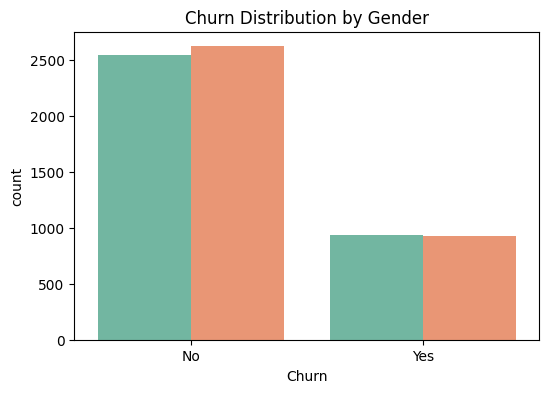

In [26]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset, x='Churn', hue='gender', palette='Set2', legend=False)
plt.title('Churn Distribution by Gender')
plt.show()


In [27]:
data_numeric = dataset.drop(columns=['customerID'])  # Drop non-numeric identifiers

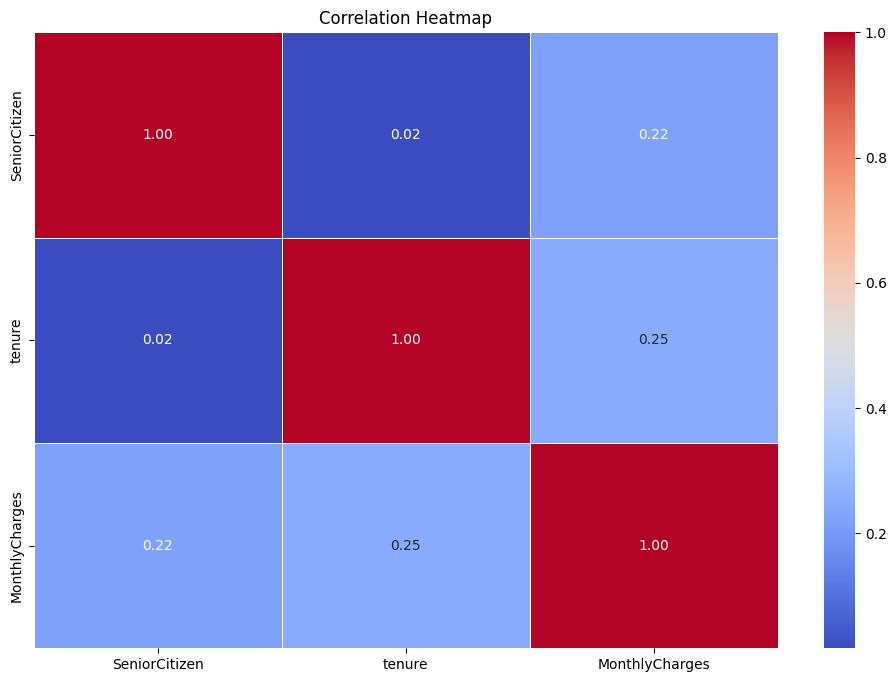

In [28]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you already have your dataset loaded
data = pd.read_csv('telco-customer-churn.csv')

# Select only the numeric columns
data_numeric = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = data_numeric.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


Correlation with Churn:
Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
tenure           -0.352229
Name: Churn, dtype: float64


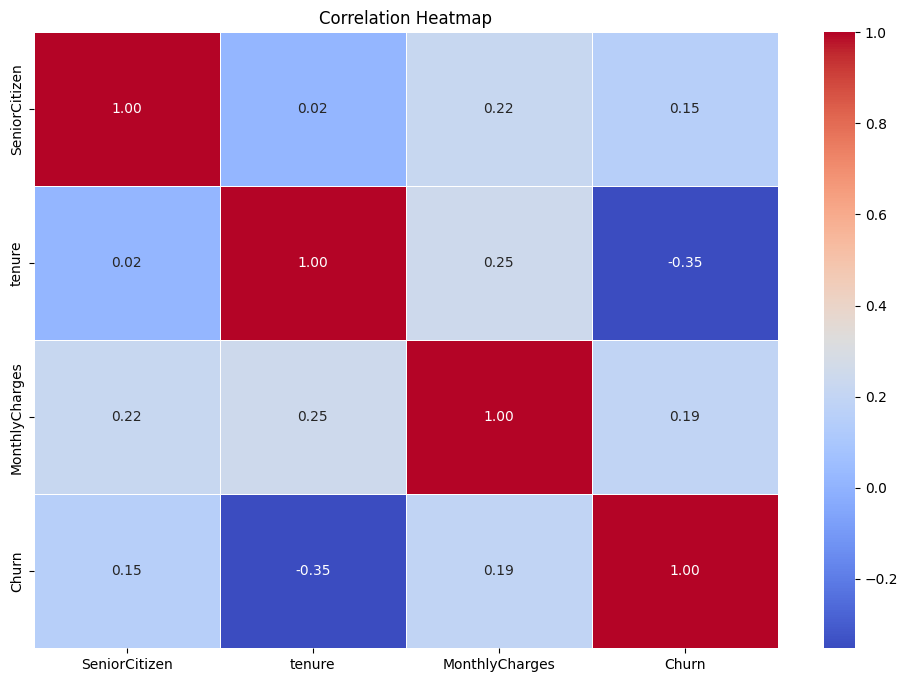

In [29]:
# Convert the 'Churn' column to numeric (e.g., Yes -> 1, No -> 0)
data['Churn'] = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Select numeric columns again after converting 'Churn' to numeric
data_numeric = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = data_numeric.corr()

# Calculate the correlation coefficients with 'Churn'
correlation_with_churn = corr['Churn'].sort_values(ascending=False)
print("Correlation with Churn:")
print(correlation_with_churn)

# Plot heatmap again to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


**Positive Correlations: MonthlyCharges: 0.193; PaperlessBilling: 0.192; SeniorCitizen: 0.151**

**5. Split Dataset**

In [30]:
!pip install sweetviz
!pip uninstall visions
!pip install visions==0.7.6



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 2.6 MB/s eta 0:00:00


In [31]:
from sklearn.model_selection import train_test_split
import sweetviz as sv

In [32]:
# Define the features (X) and the target (y)
X = dataset.drop(columns=['Churn'])  # Drop the 'Churn' column
y = dataset['Churn']  # Target variable

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Combine the training and test data back with their respective labels for SweetViz
train_data = X_train.copy()
train_data['Churn'] = y_train

test_data = X_test.copy()
test_data['Churn'] = y_test

# Generate the SweetViz report
report = sv.compare([train_data, "Training Data"], [test_data, "Testing Data"])
report.show_html('sweetviz_comparison_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_comparison_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [33]:
from IPython.display import IFrame

# Display the SweetViz report in the notebook
IFrame(src='./sweetviz_comparison_report.html', width=950, height=600)

import webbrowser

# Manually open the SweetViz report in your default browser
webbrowser.open('sweetviz_comparison_report.html')

import os

# Check if the report file exists
print(os.path.isfile('sweetviz_comparison_report.html'))


True


**Pandas Profiling**

In [34]:
pip install pandas-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 58.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=86dcbb6478b83e7deb989c329c9f281775d231363bf512115e90fbc89de9bc78
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [37]:
!pip uninstall numba -y
!pip install --upgrade numba
!pip install numba==0.53.0
!pip uninstall ydata_profiling visions numba
!pip install ydata_profiling

Found existing installation: numba 0.60.0
Uninstalling numba-0.60.0:
  Successfully uninstalled numba-0.60.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 22.2 MB/s eta 0:00:00
ERROR: Ignored the following versions that require a different python version: 0.52.0 Requires-Python >=3.6,<3.9; 0.52.0rc3 Requires-Python >=3.6,<3.9; 0.53.0 Requires-Python >=3.6,<3.10; 0.53.0rc1.post1 Requires-Python >=3.6,<3.10; 0.53.0rc2 Requires-Python >=3.6,<3.10; 0.53.0rc3 Requires-Python >=3.6,<3.10; 0.53.1 Requires-Python >=3.6,<3.10; 0.54.0 Requires-Python >=3.7,<3.10; 0.54.0rc2 Requires-Python >=3.7,<3.10; 0.54.0rc3 Requires-Python >=3.7,<3.10; 0.54.1 Requires-Python >=3.7,<3.10
ERROR: Could not find a version that satisfies the requirement numba==0.53.0 (from versions: 0.1, 0.2, 0.3, 0.5.0, 0.6.0, 0.7.0, 0.7.1, 0.7.2, 0.8.0, 0.8.1, 0.9.0, 0.10.0, 0.10.1, 0.11.0, 0.12.0, 0.12.1, 0.12.2, 0.13.0, 0.13.2, 0.13.3, 0.13.4, 0.14.0, 0.15.1, 0.16.0, 0.17.0, 0.18.1, 0.18.2, 0.19.1, 0.19.2, 0.20.0, 0.

In [38]:
from ydata_profiling import ProfileReport

In [39]:
# Create the profile report
profile = ProfileReport(dataset, title="Telco Customer Churn - Pandas Profiling Report", explorative=True)

# Save the report as an HTML file
profile.to_file("ydata_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Challenges**

Class Imbalance in the Target Variable (Churn):
Issue: The dataset often has an imbalanced distribution between customers who churn and those who don’t. Typically, there are far fewer customers who churn compared to those who remain. This imbalance can lead to biased models that tend to predict the majority class (non-churn) more accurately while underperforming on the minority class (churn).
Impact: It may affect the accuracy of churn predictions, particularly for the minority class (churners).

Presence of Categorical Variables:
Issue: Many features in the dataset, such as InternetService, Contract, and PaymentMethod, are categorical. These categorical features need to be transformed into numeric form for machine learning models, which can introduce complexity and require careful handling (e.g., one-hot encoding, label encoding).
Impact: Improper encoding can lead to multicollinearity or loss of information, affecting model performance.

  Potential Redundancy and Low Variability in Some Features:
Issue: Some features, like PhoneService and MultipleLines, may show very low variability (e.g., most customers might have a phone service). Features with low variability might contribute little to predicting churn and could introduce noise into the model.
Impact: These features may not be as informative and could potentially be removed to simplify the model and improve interpretability.